<a href="https://colab.research.google.com/github/Akhil9037/Galaxies/blob/main/spectra_analysis_0282.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

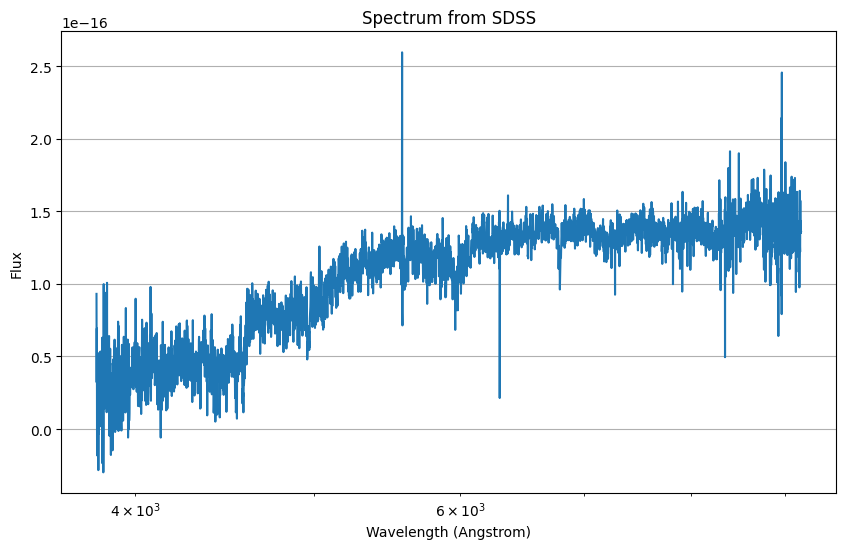

Emission Lines: {'H-alpha': 6563, 'O III': [4959, 5007]}
Absorption Lines: {'Ca II': [3934, 3968]}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
# Load the FITS file
fits_file = 'https://data.sdss.org/sas/dr17/sdss/spectro/redux/26/spectra/lite/1733/spec-1733-53047-0282.fits'
hdul = fits.open(fits_file)

# Extract data
data = hdul[1].data
wavelength = 10**data['loglam']* u.AA  # Convert log wavelength to actual wavelength
flux = data['flux']* 10**-17 * u.Unit('erg cm-2 s-1 AA-1')

# Plotting the spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavelength, flux)
plt.title('Spectrum from SDSS')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.xscale('log')  # Log scale for better visibility
plt.grid()

# Identifying emission and absorption lines manually or through known line lists would go here

# Show plot
plt.show()
# Identify emission/absorption lines based on known positions
emission_lines = {'H-alpha': 6563, 'O III': [4959, 5007]}
absorption_lines = {'Ca II': [3934, 3968]}

print("Emission Lines:", emission_lines)
print("Absorption Lines:", absorption_lines)

hdul.close()